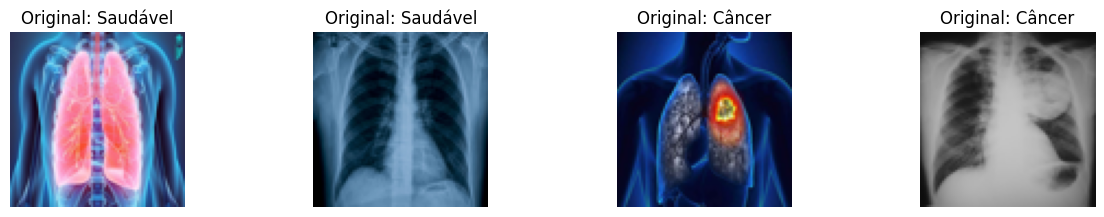

Número de amostras no conjunto de imagens: 4
Tamanho das imagens: (80, 80, 3)
Número de classes: 2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 78, 78, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 39, 39, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                       

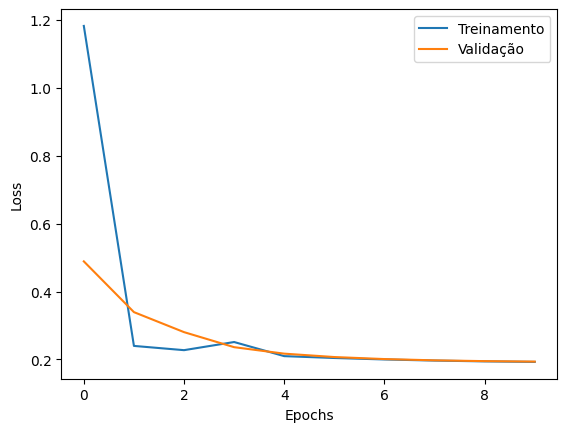

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

#Carregar e pré-processar dados
def carregar_imagens(caminhos, tamanho_alvo=(80, 80)):
    imagens = []
    rotulos = []

    for caminho_imagem in caminhos:
        img = Image.open(caminho_imagem)
        img = img.resize(tamanho_alvo)
        img_array = np.array(img)
        imagens.append(img_array)
        rotulo = 1 if "cancer" in caminho_imagem.lower() else 0
        rotulos.append(rotulo)

    return np.array(imagens) / 255.0, np.array(rotulos)

caminhos_imagens = ["/content/pulmaoSaudavel2.jpg", "/content/pulmaoSaudavel.jpg", "/content/cancerdepulmao.jpg", "/content/cancerdepulmao2.jpg"]
X, y = carregar_imagens(caminhos_imagens)

#Dividir em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Visualização das imagens
plt.figure(figsize=(15, 5))
for i in range(len(caminhos_imagens)):
    plt.subplot(2, len(caminhos_imagens), i + 1)
    img = Image.open(caminhos_imagens[i]).resize((80, 80))
    plt.imshow(np.array(img))
    classe_original = 'Câncer' if "cancer" in caminhos_imagens[i].lower() else 'Saudável'
    plt.title(f'Original: {classe_original}')
    plt.axis('off')
plt.show()

#Informações sobre a quantidade de imagens, o shape e as classes
print("Número de amostras no conjunto de imagens:", len(X))
print("Tamanho das imagens:", X[0].shape)
print("Número de classes:", len(np.unique(y)))

#Construção do modelo CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')])

#Ajuste da taxa de aprendizado dinâmica
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=10000, decay_rate=0.9)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Exibe o resumo do modelo
model.summary()

#Treinamento do modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

#Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Acurácia do modelo: {accuracy}')

#Visualização das curvas de aprendizado
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Epochs')
plt.ylabel('Loss')
print("")
print("------------------------------------------------------------------")
print("")
plt.legend()
plt.show()
